In [2]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [3]:
df = pd.read_hdf('../../output/good.h5')

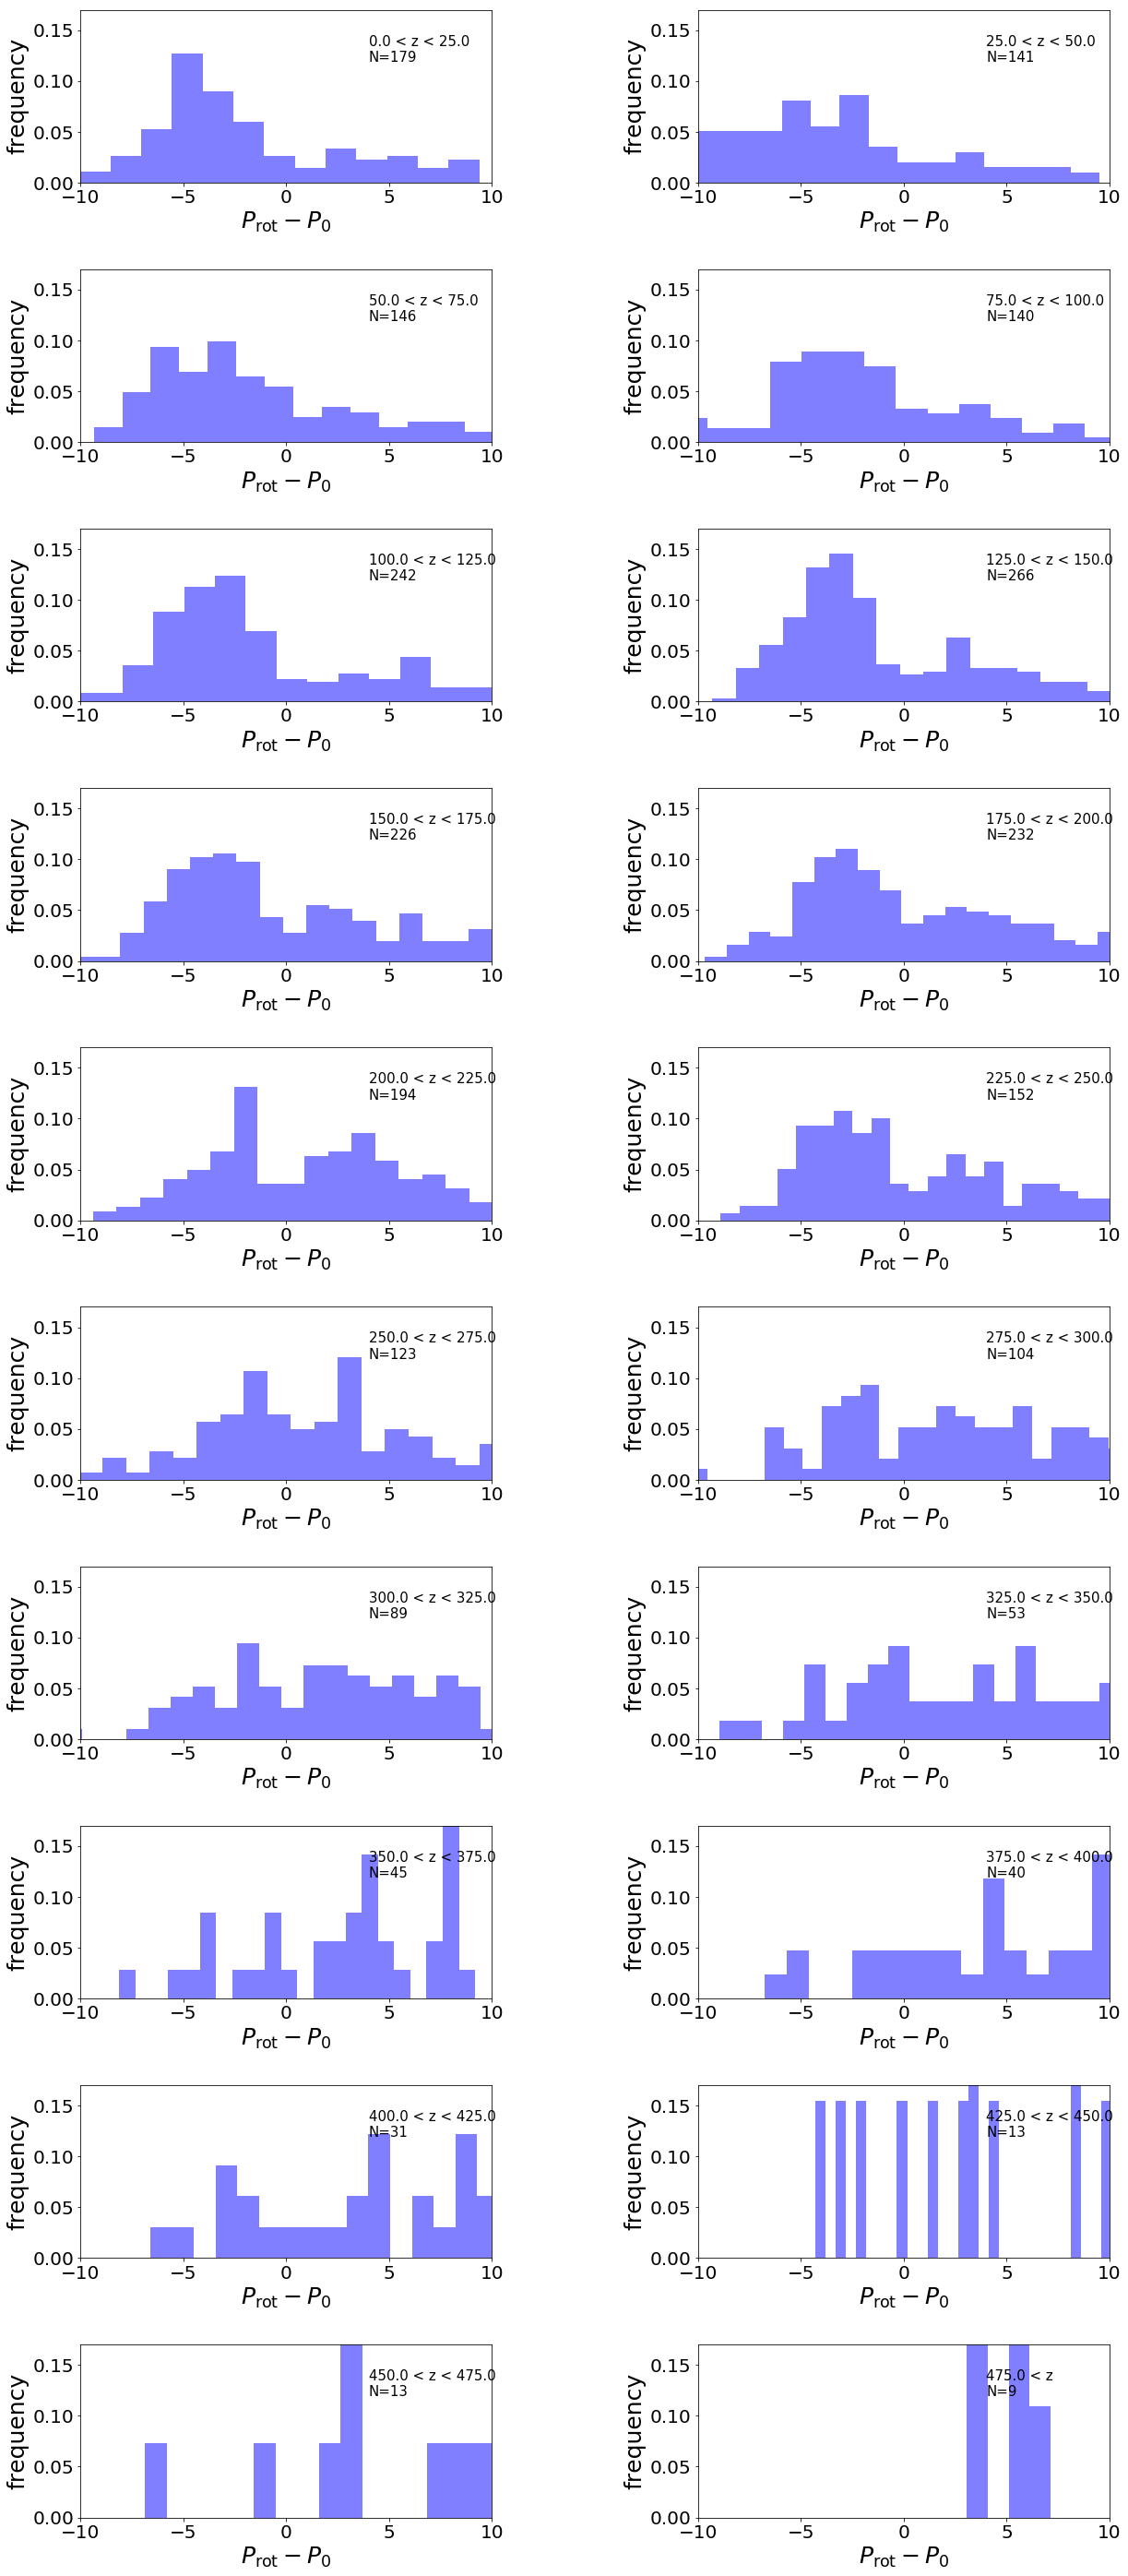

In [5]:
height = np.linspace(0, 500, 21)
gyrochrone = gyr.Gordon2019(df['B_V'])
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.0) & (df['B_V'] < 2.0)
fig, axs = pl.subplots(len(height)//2, 2, figsize=(20, 50))
axs = np.concatenate(axs)
pl.subplots_adjust(wspace=0.5, hspace=0.5)
#xs = np.concatenate(axs)
for i in range(1, len(height)):
    cut = (np.abs(df['galcen_z']) > height[i-1]) & (np.abs(df['galcen_z']) < height[i])
    mask = finite_age_mask & cut & color_mask
    perdiff = np.exp(df['logperiod_mean'][mask]) - gyrochrone[mask]
    if i == len(height)-1:
        axs[i-1].annotate("{0} < z \nN={1}".format(height[i-1], np.sum(mask)), 
                    xy=(0.7, 0.7), xycoords='axes fraction', fontsize=15)
    else:
        axs[i-1].annotate("{0} < z < {1}\nN={2}".format(height[i-1], height[i], np.sum(mask)), 
                    xy=(0.7, 0.7), xycoords='axes fraction', fontsize=15)
    axs[i-1].hist(perdiff, color='b', density=True, bins=30, alpha=0.5)
    axs[i-1].set_xlabel(r'$P_\mathrm{{rot}} - P_0$')
    axs[i-1].set_ylabel('frequency')
    axs[i-1].set_ylim(0, 0.17)
    axs[i-1].set_xlim(-10, 10)
pl.savefig("heights.pdf")

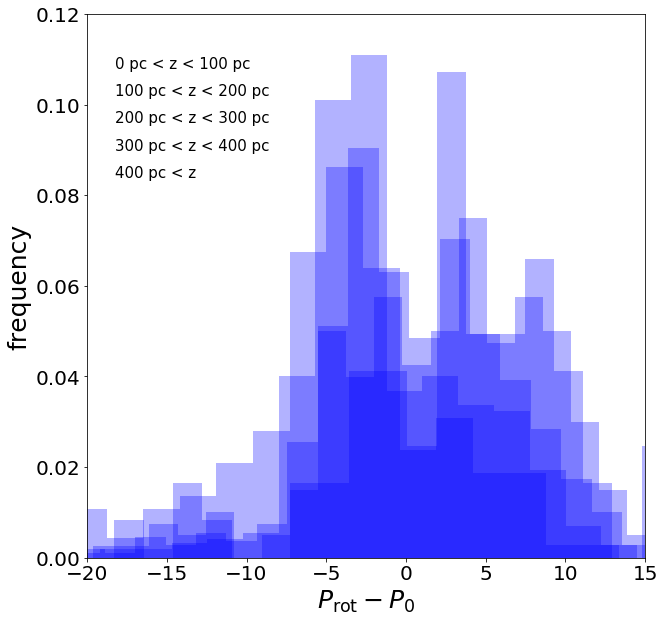

In [7]:
height = [0, 100, 200, 300, 400, np.inf]
gyrochrone = gyr.Gordon2019(df['B_V'])
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.0) & (df['B_V'] < 2.0)
#fig, axs = pl.subplots(len(height)//2, 2, figsize=(20, 20))
pl.figure(figsize=(10, 10))
#axs = np.concatenate(axs)
#pl.subplots_adjust(wspace=0.5, hspace=0.5)
#xs = np.concatenate(axs)
pl.xlabel(r'$P_\mathrm{{rot}} - P_0$')
pl.ylabel('frequency')
pl.ylim(0, 0.12)
pl.xlim(-20, 15)
for i in range(1, len(height)):
    cut = (np.abs(df['galcen_z']) > height[i-1]) & (np.abs(df['galcen_z']) < height[i])
    mask = finite_age_mask & cut & color_mask
    perdiff = np.exp(df['logperiod_mean'][mask]) - gyrochrone[mask]
    if i == len(height)-1:
        slice_ann = pl.annotate("{0} pc < z ".format(height[i-1]), 
                          xy=(0.05, 0.9-0.05*(i-1)), xycoords='axes fraction', fontsize=15)
    else:
        slice_ann = pl.annotate("{0} pc < z < {1} pc".format(height[i-1], height[i]), 
                          xy=(0.05, 0.9-0.05*(i-1)), xycoords='axes fraction', fontsize=15)
    pl.hist(perdiff, color='b', density=True, bins=20, alpha=0.3)
    pl.savefig("/Users/tgordon/Desktop/heights{0}.pdf".format(i))
    #num_ann.remove()
#pl.savefig("heights.pdf")

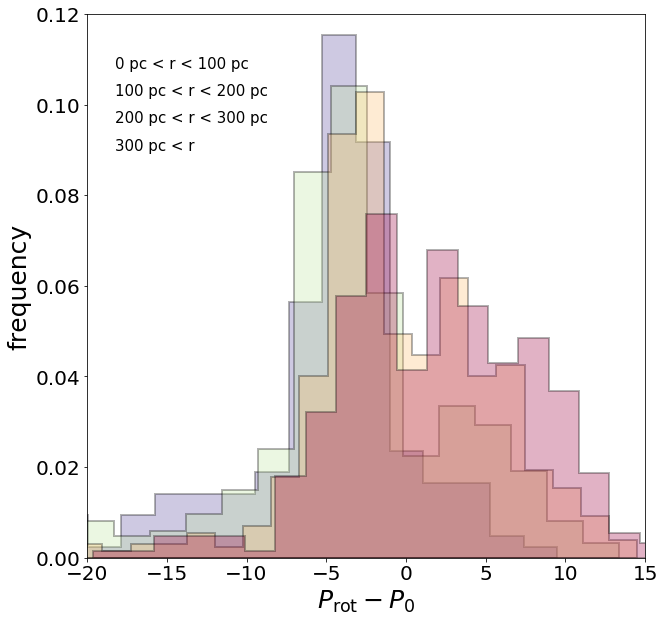

In [52]:
height = [0, 100, 200, 300, np.inf]
gyrochrone = gyr.Gordon2019(df['B_V'])
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.0) & (df['B_V'] < 2.0)
#fig, axs = pl.subplots(len(height)//2, 2, figsize=(20, 20))
pl.figure(figsize=(10, 10))
#axs = np.concatenate(axs)
#pl.subplots_adjust(wspace=0.5, hspace=0.5)
#xs = np.concatenate(axs)
pl.xlabel(r'$P_\mathrm{{rot}} - P_0$')
pl.ylabel('frequency')
pl.ylim(0, 0.12)
pl.xlim(-20, 15)
cm = pl.cm.Spectral_r
colors = cm(np.linspace(0, 1, 4))
for i in range(1, len(height)):
    cut = (np.abs(df['r_est']) > height[i-1]) & (np.abs(df['r_est']) < height[i])
    mask = finite_age_mask & cut & color_mask
    perdiff = np.exp(df['logperiod_mean'][mask]) - gyrochrone[mask]
    if i == len(height)-1:
        slice_ann = pl.annotate("{0} pc < r ".format(height[i-1]), 
                          xy=(0.05, 0.9-0.05*(i-1)), xycoords='axes fraction', fontsize=15)
    else:
        slice_ann = pl.annotate("{0} pc < r < {1} pc".format(height[i-1], height[i]), 
                          xy=(0.05, 0.9-0.05*(i-1)), xycoords='axes fraction', fontsize=15)
    pl.hist(perdiff, color=colors[i-1], density=True, bins=20, alpha=0.3, histtype='stepfilled', edgecolor='k', linewidth=2)
    pl.savefig("/Users/tgordon/Desktop/distances{0}.pdf".format(i))
    #num_ann.remove()
#pl.savefig("distances.pdf")

In [47]:
np.linspace(0, 1, 4)

array([0.        , 0.33333333, 0.66666667, 1.        ])